In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dirCatalogs=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex018\datasets'
fileNameTrain=r'05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo.csv'
fileNameTest=r'05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv'
fileNameRun=r'04_COSMOS2015_run_WorkBands_SOMinfo.csv'

In [4]:
train=pd.read_csv(os.path.join(dirCatalogs,fileNameTrain))
test=pd.read_csv(os.path.join(dirCatalogs,fileNameTest))
run=pd.read_csv(os.path.join(dirCatalogs,fileNameRun))

In [10]:
run=run[run['photoZ_SED']<1.2]

In [19]:
run=run[run['photoZ_SED_outlCoeff'].abs()<1]
run=run[run['trainMapOccupation']>5]

In [20]:
len(run)

33865

(array([ 171.,  269.,  494.,  381.,  491.,  759.,  621., 1070., 1688.,
        1829., 1251.,  911., 1350., 1265., 1266., 1278., 1947., 1653.,
        1707., 1198., 1808., 1862., 1829., 2098., 1786.,  653.,  481.,
         501.,  649.,  599.]),
 array([0.005 , 0.0448, 0.0846, 0.1244, 0.1642, 0.204 , 0.2438, 0.2836,
        0.3234, 0.3632, 0.403 , 0.4428, 0.4826, 0.5224, 0.5622, 0.602 ,
        0.6418, 0.6816, 0.7214, 0.7612, 0.801 , 0.8408, 0.8806, 0.9204,
        0.9602, 1.    , 1.0398, 1.0796, 1.1194, 1.1592, 1.199 ]),
 <a list of 30 Patch objects>)

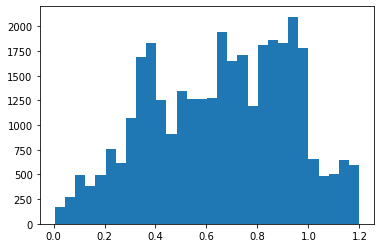

In [21]:
plt.hist(run['photoZ_SED'],bins=30)

In [22]:
train=train[train['photoZ_SED']<1.2]
train=train[train['photoZ_SED_outlCoeff'].abs()<1]
train=train[train['trainMapOccupation']>5]
test=test[test['photoZ_SED']<1.2]
test=test[test['photoZ_SED_outlCoeff'].abs()<1]
test=test[test['trainMapOccupation']>5]

In [26]:
[test.drop(c,inplace=True,axis=1) for c in (set(train.columns)-set(run.columns))]
[train.drop(c,inplace=True,axis=1) for c in (set(train.columns)-set(run.columns))]

[None, None, None, None, None, None]

In [30]:
run=run.append(train).append(test)

C:\Anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [33]:
run.columns

Index(['Bmagap3', 'DEJ2000', 'Hmagap3', 'IB574ap3', 'Jmagap3', 'Ksmagap3',
       'RAJ2000', 'Seq', 'Vmagap3', 'Ymagap3', 'cellID_RunBigSOM',
       'cellID_RunSOM', 'cellID_TrainSOM', 'ipmagap3', 'photoZ_ML',
       'photoZ_ML_outlCoeff', 'photoZ_SED', 'photoZ_SED_outlCoeff', 'quantErr',
       'quantErr_outlCoeff', 'residML_SED', 'rmagap3', 'sc_Bmagap3',
       'sc_Hmagap3', 'sc_Jmagap3', 'sc_Ksmagap3', 'sc_Vmagap3', 'sc_Ymagap3',
       'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'trainMapOccupation', 'umagap3', 'w_sc_Bmagap3', 'w_sc_Hmagap3',
       'w_sc_Jmagap3', 'w_sc_Ksmagap3', 'w_sc_Vmagap3', 'w_sc_Ymagap3',
       'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3', 'w_sc_zppmagap3',
       'zppmagap3'],
      dtype='object')

In [35]:
list(test.columns)

['RAJ2000',
 'DEJ2000',
 'Seq',
 'Ksmagap3',
 'Ymagap3',
 'Hmagap3',
 'Jmagap3',
 'Bmagap3',
 'Vmagap3',
 'ipmagap3',
 'rmagap3',
 'umagap3',
 'zppmagap3',
 'IB574ap3',
 'photoZ_SED',
 'sc_Ksmagap3',
 'sc_Ymagap3',
 'sc_Hmagap3',
 'sc_Jmagap3',
 'sc_Bmagap3',
 'sc_Vmagap3',
 'sc_ipmagap3',
 'sc_rmagap3',
 'sc_umagap3',
 'sc_zppmagap3',
 'photoZ_ML',
 'residML_SED',
 'w_sc_Ksmagap3',
 'w_sc_Ymagap3',
 'w_sc_Hmagap3',
 'w_sc_Jmagap3',
 'w_sc_Bmagap3',
 'w_sc_Vmagap3',
 'w_sc_ipmagap3',
 'w_sc_rmagap3',
 'w_sc_umagap3',
 'w_sc_zppmagap3',
 'quantErr',
 'cellID_TrainSOM',
 'cellID_RunSOM',
 'cellID_RunBigSOM',
 'photoZ_ML_outlCoeff',
 'photoZ_SED_outlCoeff',
 'quantErr_outlCoeff',
 'trainMapOccupation']

In [36]:
runExp=run[list(test.columns)]

In [38]:
runExp.to_csv(os.path.join(dirCatalogs,'06_COSMOS_SpectrZ_Zlim_1p2_Whole_SOMclean.csv'), index=False)

In [42]:
dirCatalogs=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\catalogs\forPaper\v06'
fileNameRunFull=r'01_COSMOS2015_allBands.fits'
from astropy.io import fits
from astropy import table
tabCOSMOS2015=table.Table.read(os.path.join(dirCatalogs,fileNameRunFull),format='fits')

In [43]:
tabCOSMOS2015=tabCOSMOS2015.to_pandas()
tabCOSMOS2015.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap2', 'e_Ksmagap2', 'Ksmagap3',
       'e_Ksmagap3', 'Ksmag', 'e_Ksmag', 'KsmagISO',
       ...
       'e_4_5mag_2', '5_8mag_2', 'e_5_8mag_2', '8_0mag_2', 'e_8_0mag_2',
       'NUVmag_2', 'e_NUVmag_2', 'FUVmag_2', 'e_FUVmag_2', 'zphot'],
      dtype='object', length=226)

In [53]:
runExp2=runExp.merge(tabCOSMOS2015,how='left',left_on='Seq',right_on='Seq')

In [54]:
errCols=list(c for c in runExp2.columns if ('ap3' in c and ('IA' in c or 'IB' in c or 'NB' in c) and 'e_' in c))
for c in errCols:
    runExp2=runExp2[runExp2[c]>=0]
    runExp2=runExp2[runExp2[c]<=1]

In [58]:
runExp2=runExp2[runExp2['photoZ_SED']<1]

In [59]:
len(runExp2)

40164

In [63]:
[runExp2.drop(c, inplace=True,axis=1) for c in runExp2.columns if '_x' in c]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [68]:
for c in runExp2.columns:
    if '_y' in c:
        runExp2=runExp2.rename(columns={c:c.replace('_y','')})

In [72]:
NbCols=list(c for c in runExp2.columns if ('ap3' in c and ('IA' in c or 'IB' in c or 'NB' in c) and 'e_' not in c))

In [79]:
runExp2=runExp2[list(test.columns)[:13]+NbCols+list(test.columns)[14:]]

In [81]:
runExp2.to_csv(os.path.join(r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle\ex018\datasets',
                           '06_COSMOS_SpectrZ_Zlim_1_NBands_SOMclean.csv'), index=False)

In [88]:
list(runExp2.columns).index('NB816ap3')+1

27

In [92]:
17*2

34

In [86]:
[c for c in runExp2.columns if 'ap3' in c]

['Ksmagap3',
 'Ymagap3',
 'Hmagap3',
 'Jmagap3',
 'Bmagap3',
 'Vmagap3',
 'ipmagap3',
 'rmagap3',
 'umagap3',
 'zppmagap3',
 'IA484ap3',
 'IA527ap3',
 'IA624ap3',
 'IA679ap3',
 'IA738ap3',
 'IA767ap3',
 'IB427ap3',
 'IB464ap3',
 'IB505ap3',
 'IB574ap3',
 'IB709ap3',
 'IB827ap3',
 'NB711ap3',
 'NB816ap3',
 'sc_Ksmagap3',
 'sc_Ymagap3',
 'sc_Hmagap3',
 'sc_Jmagap3',
 'sc_Bmagap3',
 'sc_Vmagap3',
 'sc_ipmagap3',
 'sc_rmagap3',
 'sc_umagap3',
 'sc_zppmagap3',
 'w_sc_Ksmagap3',
 'w_sc_Ymagap3',
 'w_sc_Hmagap3',
 'w_sc_Jmagap3',
 'w_sc_Bmagap3',
 'w_sc_Vmagap3',
 'w_sc_ipmagap3',
 'w_sc_rmagap3',
 'w_sc_umagap3',
 'w_sc_zppmagap3']